In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Optimizers for Deep Learning

## Toy example

For this one, we will be using a Quadratic formula of the form $f(x_1, x_2) = 1/2 x^T Q x - b^T x$ and check how the different optimizers perform. To do this, I am creating a Positive Definite Q matrix (also called the hessian) and a random vector b. The code for creating this, is presented below:
### Auxiliary Functions:


In [3]:
# Objective function
def objective(x, Q, b):
    return 0.5*x.T @ Q @ x - b.T @ x

# Gradient of objective function
def grad(x, Q, b):
    return Q @ x - b

### Plotting the contours of the function

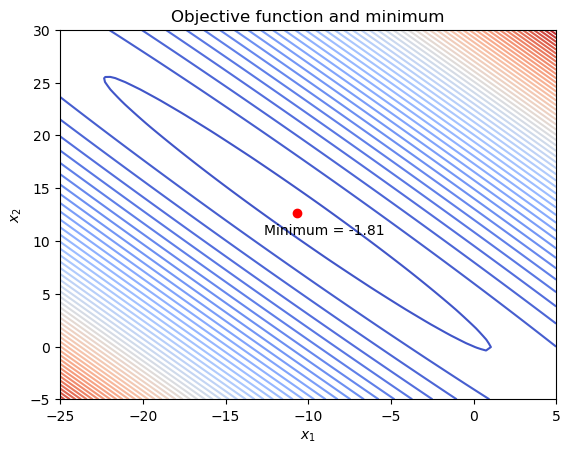

Theoretical minimum:  [[-10.6472548   12.59764455]]


In [4]:
# Simple optimization problem, a quadratic equation:
#
# Creating a positive definite matrix
np.random.seed(0)
A = np.random.rand(2,2)
A = np.dot(A,A.transpose())

# Random pd vector
b = np.random.rand(2,1)

# Let's see the objective function
x = np.linspace(-25,5,100)
y = np.linspace(-5,30,100)
X, Y = np.meshgrid(x,y)
Z = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        Z[i,j] = objective(np.array([[X[i,j]],[Y[i,j]]]), A, b)

# Contour plot:
plt.contour(X,Y,Z, 50, cmap=cm.coolwarm)
# Compute the minimum:
x_min = np.linalg.solve(A,b)
# Plot  the theoretical minimum
plt.plot(x_min[0],x_min[1],'ro', label = 'Theoretical minimum')
# Put how much is the minimum
plt.text(x_min[0]-2,x_min[1]-2,'Minimum = %.2f' % objective(x_min,A,b))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Objective function and minimum')
plt.show()
print('Theoretical minimum: ', x_min.T)

### Gradient Descent:

$ x_{k+1} = x_k - \alpha_k \nabla f(x_k) $

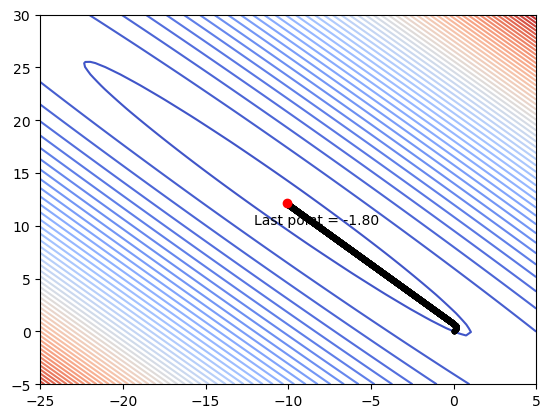

In [22]:
# Gradient descent

# Initial point
x0 = np.array([[0],[0]])

# Step size
alpha = .02

# Maximum number of iterations
max_iter = 5000

# Tolerance
tol = 1e-6

# Initialize vectors to store x and f(x) values

x = np.zeros((2,max_iter+1))
x[:,0] = x0[:,0]
f = np.zeros(max_iter+1)
f[0] = objective(x0,A,b)

# Gradient descent loop
for k in range(max_iter):
    # Compute gradient
    g = grad(x[:,k],A,b)
    # Check for convergence
    if np.linalg.norm(g) < tol:
        break
    # Update x
    x[:,k+1] = x[:,k] - alpha*g[:,0]
    # Update f(x)
    f[k+1] = objective(x[:,k+1],A,b)
    
# Plot the path of x to the minimum on top of the contour plot
plt.contour(X,Y,Z, 50, cmap=cm.coolwarm)
# Path of x 
plt.plot(x[0,0:k],x[1,0:k],'k.')
# Print last point
plt.plot(x[0,k],x[1,k],'ro', label = 'Last point')
# Put value of last point
plt.text(x[0,k]-2,x[1,k]-2,'Last point = %.2f' % f[k])
plt.show()

In [21]:
print(x_min.T)
print(x[:,-1])

[[-10.6472548   12.59764455]]
[-10.09934889  12.12458248]


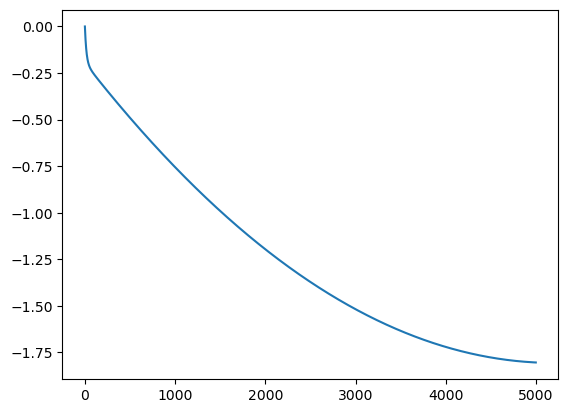

In [23]:
# plot the objective function
plt.plot(f[0:k])